In [1]:
import cv2
import sys
import os
import math
import dlib
import glob
from skimage import io
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage.color import rgb2gray, gray2rgb
from scipy import signal
from scipy.cluster.vq import kmeans,vq
from pylab import imread,imshow,show
import colorsys
from scipy import ndimage
import autoanime
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

In [2]:
fname = "Webp.net-resizeimage.jpg"
#fname = "coxinha2.jpg"
MODEL = "shape_predictor_68_face_landmarks.dat"


In [3]:
%matplotlib inline


# Identificador de pontos da face

In [4]:
def predict_shape(fname):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(MODEL)

    img = io.imread(fname)
    dets = detector(img, 1)

    for k, d in enumerate(dets): # should only detect one face
        shape = predictor(img, d)
        return shape

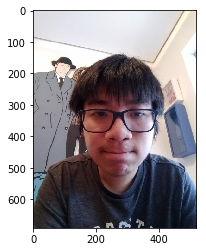

In [5]:
im = Image.open(fname)

r =predict_shape(fname)
shape = r
shapes = r
imshow(np.asarray(im))

(518, 691)

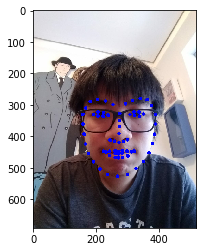

In [6]:
image_drawer = ImageDraw.Draw(im)
r.parts
for point in r.parts():
    image_drawer.ellipse((point.x-5, point.y-5,point.x+5, point.y+5), fill = 'blue', outline ='blue')
imshow(np.asarray(im))
im.size

In [7]:
def desenha_ponto(x,y,im):
    image_drawer = ImageDraw.Draw(im)
    image_drawer.ellipse((x-5, y-5,x+5, y+5), fill = 'blue', outline ='blue')


# Desenhar formato da face

In [8]:
# Pontos importantes para o contorno da face 0, 3, 13, 16

In [9]:
# 2 Pontos importantes para o contorno da face 24, 19

(518, 691)

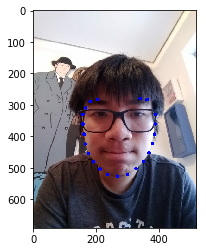

In [10]:
im = Image.open(fname)
pontos = list(range(0,20))+ list(range(24,26))
image_drawer = ImageDraw.Draw(im)
list_p =[r.part(i) for i in pontos]
for point in list_p:
    image_drawer.ellipse((point.x-5, point.y-5,point.x+5, point.y+5), fill = 'blue', outline ='blue')
imshow(np.asarray(im))
im.size

In [11]:
contorno = np.array([np.array([p.x,p.y]) for p in list_p])

In [12]:
contorno.tolist()

[[157, 330],
 [158, 361],
 [161, 393],
 [165, 424],
 [174, 454],
 [190, 481],
 [211, 503],
 [235, 521],
 [267, 526],
 [298, 521],
 [325, 502],
 [348, 479],
 [366, 452],
 [377, 423],
 [383, 393],
 [386, 361],
 [386, 330],
 [166, 310],
 [180, 290],
 [204, 283],
 [338, 280],
 [360, 284]]

In [13]:
np.inf

inf

In [14]:
def rearrange_face_contour(contorno):
    i =0
    min_y = np.inf
    size_contorno = len(contorno)
    for j,c in enumerate(contorno):
        if c[1]<min_y:
            min_y = c[1]
            i = j
    contorno_aux = contorno+ contorno
    contorno_aux = contorno_aux[i:size_contorno+i]
    return contorno_aux

In [15]:
rearrange_face_contour(contorno.tolist())

[[338, 280],
 [360, 284],
 [157, 330],
 [158, 361],
 [161, 393],
 [165, 424],
 [174, 454],
 [190, 481],
 [211, 503],
 [235, 521],
 [267, 526],
 [298, 521],
 [325, 502],
 [348, 479],
 [366, 452],
 [377, 423],
 [383, 393],
 [386, 361],
 [386, 330],
 [166, 310],
 [180, 290],
 [204, 283]]

In [16]:
contourzz = np.array([[x] for x in rearrange_face_contour(contorno.tolist())])

In [17]:
contourzz

array([[[338, 280]],

       [[360, 284]],

       [[157, 330]],

       [[158, 361]],

       [[161, 393]],

       [[165, 424]],

       [[174, 454]],

       [[190, 481]],

       [[211, 503]],

       [[235, 521]],

       [[267, 526]],

       [[298, 521]],

       [[325, 502]],

       [[348, 479]],

       [[366, 452]],

       [[377, 423]],

       [[383, 393]],

       [[386, 361]],

       [[386, 330]],

       [[166, 310]],

       [[180, 290]],

       [[204, 283]]])

In [18]:
import cv2

In [19]:
area = cv2.contourArea(contourzz)

In [20]:
area

34284.5

In [21]:
import pickle
contornos1 = pickle.load(open("contornos_template/1_cont.contour", "rb"))

In [22]:
def euclidean_distance(a,b):
    
    return np.sqrt(np.power(a-b,2).sum())

In [55]:
def find_best_matching_template(contours):
    
    templates = [pickle.load(open("contornos_template/"+str(i)+"_cont.contour", "rb")) for i in range(1,5)]
    template_head_shape = [x[0] for x in templates]
    template_head_area = [cv2.contourArea(x) for x in template_head_shape]
    template_head_perimeter = [ cv2.arcLength(x,True) for x in template_head_shape]
    template_head_enclosing_rectangle = [cv2.boundingRect(x) for x in template_head_shape]
    template_head_rectangle_area = [x[2]*x[3] for x in template_head_enclosing_rectangle]
    template_head_aspect_ratio = [y[2]/y[3] for y in template_head_enclosing_rectangle]
    template_head_compactness = [np.power(template_head_perimeter[i], 2)/template_head_area[i] for i in range(4)]
    template_head_retangularity = [template_head_area[i]/template_head_rectangle_area[i] for i in range(4)]
    
    features = np.array([template_head_aspect_ratio, template_head_compactness, template_head_retangularity])
    
    
    head_area = cv2.contourArea(contours)
    head_perimeter = cv2.arcLength(contours,True)
    head_enclosing_rectangle = cv2.boundingRect(contours)
    head_rectangle_area = head_enclosing_rectangle[2]*head_enclosing_rectangle[3]
    head_apect_ratio = head_enclosing_rectangle[2]/head_enclosing_rectangle[3]
    head_compactness = np.power(head_perimeter,2)/head_area
    head_retangularity = head_area/head_rectangle_area
    
    features = features.transpose()
    head_features = np.array([head_apect_ratio, head_compactness, head_retangularity])
    print(features)
    print(head_features)
    scores = [euclidean_distance(head_features, features[i]) for i in range(4)]
    
    return np.array(scores).argmin()
    

In [56]:
find_best_matching_template(contourzz)

[[  0.79292929  14.70544444   0.75548478]
 [  0.82539683  14.56098425   0.76305793]
 [  0.83783784  14.49627633   0.76873583]
 [  0.86666667  14.3846067    0.77861467]]
[  0.93117409  37.83492264   0.6034941 ]


0

In [25]:
templates = [pickle.load(open("contornos_template/"+str(i)+"_cont.contour", "rb")) for i in range(1,5)]
head_shape = [x[0] for x in templates]

In [26]:
perimeter = cv2.arcLength(contornos1[0],True)

In [27]:
area = cv2.contourArea(contornos1[0])

In [28]:
area

23485.0

In [29]:
image_drawer.line([(r.part(0).x, r.part(0).y), (r.part(3).x,r.part(3).y)], fill=(255,0,0), width =2)
image_drawer.line([(r.part(13).x, r.part(13).y), (r.part(16).x,r.part(16).y)], fill=(255,0,0), width =2)

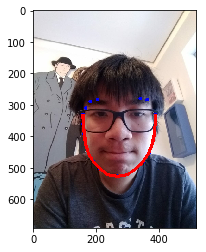

In [30]:

for i in range(1, 17):
    image_drawer.line([(r.part(i-1).x, r.part(i-1).y), (r.part(i).x,r.part(i).y)], fill=(255,0,0), width =10)
imshow(np.asarray(im))

# Análise da coloração do cabelo

In [31]:
import colorsys
rgb_to_hsv = np.vectorize(colorsys.rgb_to_hsv)
hsv_to_rgb = np.vectorize(colorsys.hsv_to_rgb)

In [32]:
def shift_hue(arr, hout):
    r, g, b, a = np.rollaxis(arr, axis=-1)
    h, s, v = rgb_to_hsv(r, g, b)
    h = hout
    r, g, b = hsv_to_rgb(h, s, v)
    arr = np.dstack((r, g, b, a))
    return arr

In [33]:
def shift_hue(arr, hout):
    r, g, b, a = np.rollaxis(arr, axis=-1)
    h, s, v = rgb_to_hsv(r, g, b)
    h = hout
    r, g, b = hsv_to_rgb(h, s, v)
    arr = np.dstack((r, g, b, a))
    return arr

In [34]:
def colorize(image, hue):
    """
    Colorize PIL image `original` with the given
    `hue` (hue within 0-360); returns another PIL image.
    """
    img = image.convert('RGBA')
    arr = np.array(np.asarray(img).astype('float'))
    new_img = Image.fromarray(shift_hue(arr, hue/360.).astype('uint8'), 'RGBA')

    return new_img

In [35]:
r, s, v = rgb_to_hsv(230,230,250)
r

array(0.6666666666666666)

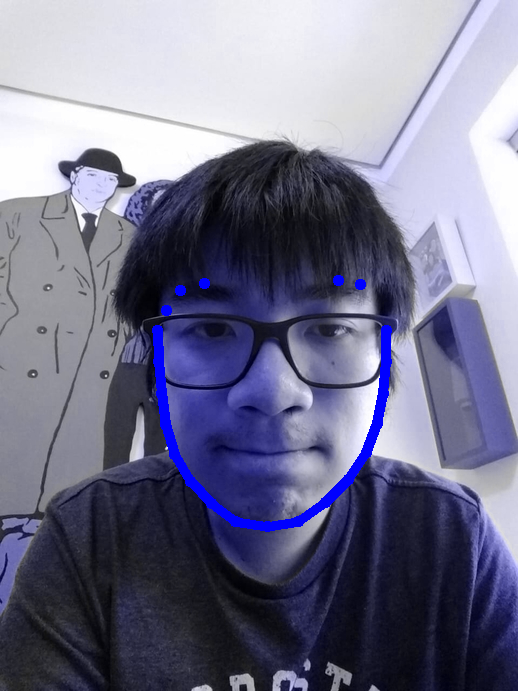

In [36]:
colorize(im, r*360)

# Detecção de olhos

In [37]:
from skimage.color import rgb2gray, gray2rgb

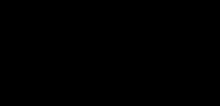

In [38]:
olho_l_depois = Image.open("./imagens_temp/olho_direito_mask.jpg")
olho_l_depois

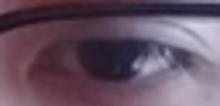

In [39]:
olho_l = Image.open("./imagens_temp/olho_direito_mask_2.jpg")
olho_l

In [40]:
olho_l_matrix = np.array(olho_l)
olho_l_matrix.shape

(106, 220, 3)

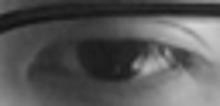

In [41]:
Image.fromarray(np.array(gray2rgb(rgb2gray(olho_l_matrix))*256, dtype = np.uint8))

# Nova imagem de saida

In [42]:
new_im = Image.new("RGB", (im.size[0], im.size[1]), color=(255,255,255))

## Detecção da mascara do cabelo

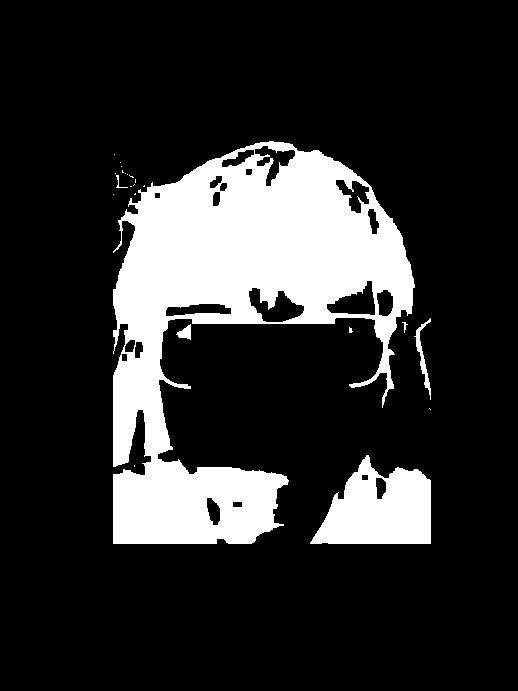

In [43]:
####### ABRE ARQUIVO ############
img = cv2.imread(fname)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

####### Filtro Gaus ############

img = cv2.imread(fname,0)
filtered_img = ndimage.filters.gaussian_filter(img,60) #20 #40
cv2.imwrite("./imagens_temp/gray.jpg",gray)
cv2.imwrite("./imagens_temp/filtered_img.jpg",filtered_img)
mask = img - filtered_img
cv2.imwrite("./imagens_temp/mask.jpg",mask)

####### Threshold ############
threshold = 170 # 100
mask[mask < threshold] = 0
mask[mask >= threshold] = 255
cv2.imwrite("./imagens_temp/threshold.jpg",mask)



##### Recorta cabelo ############
img = cv2.imread(fname)
img = img[int(shapes.part(20).y-(shapes.part(33).y - shapes.part(27).y)*1.5): int(shapes.part(20).y - (shapes.part(33).y - shapes.part(27).y)/4), shapes.part(0).x:shapes.part(16).x]
cv2.imwrite("./imagens_temp/path.jpg",img)

######### Calcula media da cor do cabelo
r,g,b = cv2.split(img)
mean_r = np.mean(r)
mean_g = np.mean(g)
mean_b = np.mean(b)
std_r = np.std(r)
std_g = np.std(g)
std_b = np.std(b)

####### Separa a cor 
img = cv2.imread(fname)
r,g,b = cv2.split(img)
r[r > mean_r + std_r] = 0
r[r < mean_r - std_r] = 0
r[r > 0] = 255
b[b > mean_b + std_b] = 0
b[b < mean_b - std_b] = 0
b[b > 0] = 255
g[g > mean_g + std_g] = 0
g[g < mean_g - std_g] = 0
g[g > 0] = 255

color_mask = np.zeros((len(r), len(r[0])))
for i in range(len(r)):
    for j in range(len(r[0])):
        if r[i][j] == 255 and b[i][j] == 255 and g[i][j] == 255 and mask[i][j] == 255:
            color_mask[i][j] = 255

color_mask[shapes.part(38).y:shapes.part(56).y,shapes.part(36).x:shapes.part(45).x] = 0

######## EXTRAÇÃO E IDENTIFICAÇÃO DE PONTOS PRINCIPAIS

############ EIXO Y
topo_cabeca = int(shapes.part(20).y-(shapes.part(33).y - shapes.part(27).y)*1.5)
queixo = shapes.part(8).y
tamanho_cabeca = int(topo_cabeca - queixo)
corte_superior_da_mascara = int(shapes.part(20).y-(shapes.part(33).y - shapes.part(27).y)*1.7)
corte_inferior_da_mascara = queixo- int(tamanho_cabeca *0.05)

color_mask[0:corte_superior_da_mascara,:] = 0
color_mask[corte_inferior_da_mascara:,:] = 0


############ EIXO X
lado_direito = shapes.part(1).x
lado_esquerdo = shapes.part(16).x
tamanho_da_cabeca = abs(lado_esquerdo-lado_direito)
corte_direito = shapes.part(1).x- int(tamanho_da_cabeca* 0.2)
corte_esquerdo = shapes.part(16).x+ int(tamanho_da_cabeca* 0.2)
color_mask[:,0:corte_direito] = 0
color_mask[:,corte_esquerdo:] = 0

color_mask = np.uint8(color_mask)

# Try to fill in holes
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(color_mask,kernel,iterations = 2)
erosion = cv2.erode(dilation,kernel,iterations=2)


cv2.imwrite("./imagens_temp/sep.jpg",erosion)
mask = erosion
Image.fromarray(erosion)

## Matching de mascaras contra templates

In [44]:
#################   NORMALIZACAO DA MASCARA ######################
face_width = shapes.part(0).x - shapes.part(16).x
shift_x = mask.shape[1]/2 - shapes.part(0).x + face_width/2
rows,cols = mask.shape
M = np.float32([[1,0,shift_x],[0,1,0]])
mask = cv2.warpAffine(mask,M,(cols,rows))
ratio = -400./face_width
    
mask = cv2.resize(mask, (int(mask.shape[1]*ratio), int(mask.shape[0]*ratio)))
rows,cols = mask.shape
shift_y = 410 - shapes.part(0).y*ratio 
M = np.float32([[1,0,0],[0,1,shift_y]])
mask = cv2.warpAffine(mask,M,(cols,rows))
mask = cv2.resize(mask, (int(mask.shape[1]/3), int(mask.shape[0]/3)))
mask_normed = (mask - mask.mean()) / mask.std()
mask_normed

array([[-0.47750244, -0.47750244, -0.47750244, ..., -0.47750244,
        -0.47750244, -0.47750244],
       [-0.47750244, -0.47750244, -0.47750244, ..., -0.47750244,
        -0.47750244, -0.47750244],
       [-0.47750244, -0.47750244, -0.47750244, ..., -0.47750244,
        -0.47750244, -0.47750244],
       ..., 
       [-0.47750244, -0.47750244, -0.47750244, ..., -0.47750244,
        -0.47750244, -0.47750244],
       [-0.47750244, -0.47750244, -0.47750244, ..., -0.47750244,
        -0.47750244, -0.47750244],
       [-0.47750244, -0.47750244, -0.47750244, ..., -0.47750244,
        -0.47750244, -0.47750244]])

In [45]:
import pandas as pd


In [46]:
pd.read_csv("eyes_dim.csv", sep = ";")

,file_name,width,height
0,1-l-f,173,57
1,1-l-m,163,67
2,1-r-f,146,55
3,1-r-m,145,56
4,2-l-f,144,52
5,2-l-m,167,64
6,2-r-f,136,67
7,2-r-m,160,64
8,3-l-f,162,67
9,3-l-m,153,54


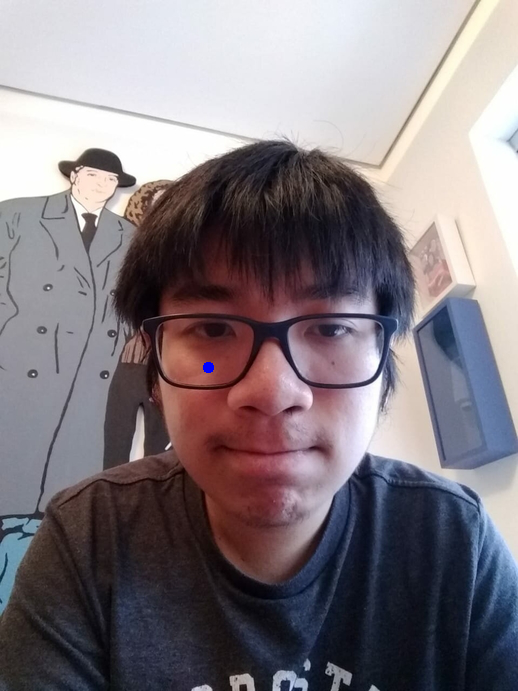

In [47]:
im = Image.open(fname)


topo_cabeca = int(shapes.part(20).y-(shapes.part(33).y - shapes.part(27).y)*1.5)
queixo = shapes.part(8).y
tamanho_cabeca_2 = int(topo_cabeca - queixo)
corte_superior_da_mascara = int(shapes.part(20).y-(shapes.part(33).y - shapes.part(27).y)*1.7)
corte_inferior_da_mascara = queixo- int(tamanho_cabeca *0.05)

lado_direito = shapes.part(1).x
lado_esquerdo = shapes.part(16).x
tamanho_da_cabeca = abs(lado_esquerdo-lado_direito)
queixo = shapes.part(8).y
tamanho_cabeca = int(corte_superior_da_mascara - queixo)
desenha_ponto( shapes.part(16).x+tamanho_cabeca*0.45, shapes.part(16).y-tamanho_cabeca_2*0.1, im)
im

In [48]:
## ESQUERDO 
desenha_ponto( shapes.part(16).x+tamanho_cabeca*0.45, shapes.part(16).y-tamanho_cabeca_2*0.1, im)
# DIREITA
desenha_ponto( shapes.part(16).x+tamanho_cabeca*0.15, shapes.part(16).y-tamanho_cabeca_2*0.1, im)

In [49]:
tamanho_cabeca*0.60

-237.0

In [50]:
-tamanho_da_cabeca

-228

In [51]:
tamanho_cabeca*0.25

-98.75

In [52]:
im.paste(angry_vein_resized, (int( shapes.part(16).x-tamanho_da_cabeca/3), int(shapes.part(16).y+tamanho_cabeca_2*0.33)) , mask = angry_vein_resized)

NameError: name 'angry_vein_resized' is not defined

In [ ]:
im

In [ ]:
blush = Image.open("blush2.png")
np.array(np.array(blush.size)/(blush.size[0]/(tamanho_da_cabeca*0.3)), dtype = np.int32)

In [ ]:
(tamanho_da_cabeca*0.3)

In [ ]:
blush.size

In [ ]:
im.paste(blush, (100,100), mask = blush)

In [ ]:
im

In [ ]:
angry_vein = Image.open("angry_vein.png")
angry_vein

In [ ]:
angry_vein_resized  = angry_vein.resize(np.array(np.array(angry_vein.size)/(angry_vein.size[0]/(tamanho_da_cabeca*0.45)), dtype = np.int32) , resample=Image.BICUBIC)

In [ ]:
blush_resized = blush.resize(np.array(np.array(blush.size)/(blush.size[0]/(tamanho_da_cabeca*0.45)), dtype = np.int32) , resample=Image.BICUBIC)

In [ ]:
blush_resized

In [ ]:
im.paste(blush_resized, (int( shapes.part(16).x-tamanho_da_cabeca), int(shapes.part(16).y-tamanho_cabeca_2*0.1)) , mask = blush_resized)

In [ ]:
im = Image.open(fname)
i = 0
desenha_ponto( shapes.part(i).x, shapes.part(i).y, im)
imshow(np.asarray(im))